## Importación librerias

In [1]:

import pandas as pd
import numpy as np


from IPython.display import display 





## Comprobación entorno
Terminal, Kernel y notebook mismo entorno


In [2]:
import sys, os
print(sys.executable)          
print(os.environ.get("VIRTUAL_ENV"))  


c:\Users\Propietario\Desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\.venv\Scripts\python.exe
C:\Users\Propietario\desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\.venv


## Carga de datos

In [3]:
df_customer = pd.read_excel("../Data/Raw/customer-details.xlsx")

Uno todas las hojas del Excell

In [4]:
df_customer = pd.concat(
    pd.read_excel("../Data/Raw/customer-details.xlsx", sheet_name=None).values(),
    ignore_index=True
)


In [5]:
df_customer. sample(10)

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
25137,5022,121767,2,0,2013-11-23,13,ed45f9f8-aba1-4619-b314-51330b5d747a
40889,11809,11297,2,2,2014-01-20,29,4769b0fc-b786-4517-bce2-cde07dfadf09
39793,10713,92870,0,0,2014-10-10,31,d81ab8e1-d851-4b59-b60b-00a62bca5c51
39729,10649,52528,2,0,2014-11-10,9,4e679f74-5f83-48a1-ad24-ebabf0277e97
32361,3281,60178,2,1,2014-05-13,8,cc8a53a8-e89d-4bee-a277-61cdd81df7cd
30251,1171,151567,1,1,2014-04-03,6,f0d438c8-5d3e-4d30-ad38-501dbd04cf3a
20112,20112,135009,0,0,2012-09-14,17,3769cb72-26be-40f2-9a93-f752fc96d628
35646,6566,30992,1,0,2014-03-21,16,e959e29f-accd-4e82-a232-a521be56d2e4
22196,2081,16304,1,0,2013-04-04,9,37201c4d-9526-4214-9eea-27f65e4877f4
18028,18028,74440,0,2,2012-05-28,11,a9345004-799d-49a1-8eb2-612dabfce896


In [6]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB


# Columnas e información

0. Unnamed: 0 (int64)

No es una variable útil: se puede eliminar.

1. Income (int64)

Ingresos de la persona/cliente: análisis socioeconómico

2. Kidhome (int64)

Número de hijos pequeños en el hogar: variable numérica

3. Teenhome (int64)

Número de adolescentes en el hogar: variable numérica

4. Dt_Customer (datetime64[ns])

Fecha en la que el cliente se unió / fue registrado: antiguedad.

5. NumWebVisitsMonth (int64)

Número de visitas web al mes: comportamiento online.

6. ID (object)

Identificador único del cliente: clave primaria.

# * Pasos limpieza y transformación

1.	Eliminar Unnamed: 0.

2.	Revisar duplicados en ID.

3.	Distribución de Income: outliers, clientes con ingresos extremos.

4.	Distribución de Kidhome y Teenhome: hogares sin hijos, con hijos, etc.

5.	Antigüedad del cliente: calcular diferencia entre fecha actual y Dt_Customer.

6.	NumWebVisitsMonth: nº visitas.


# 1. Eliminar Unnamed

1. Ver todas las columnas
2. Quito cualquier columna que empiece por Unnamed
3. Confirmo resultado


In [7]:

print(df_customer.columns)

df_customer = df_customer.loc[:, ~df_customer.columns.str.contains('^Unnamed')]

print(df_customer.columns)



Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'ID'],
      dtype='object')
Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'ID'],
      dtype='object')


# 2. Revisar duplicados de id

1. Nº de IDs totales
2. Nº de IDs únicos
3. Nº de duplicados

In [8]:
total_ids = df_customer['ID'].shape[0]

unique_ids = df_customer['ID'].nunique()

duplicated_ids = total_ids - unique_ids

print("Total de registros:", total_ids)
print("IDs únicos:", unique_ids)
print("Duplicados:", duplicated_ids)


Total de registros: 43170
IDs únicos: 43170
Duplicados: 0


# 3. Distribución de Income

1. Aseguro tipo numérico y revisa nulos
2. Chequeos rápidos de calidad
3. Detección de outliers (regla IQR): No se detectan outliers en la variable Income según la regla IQR y percentiles (p01–p99). Se mantiene la variable sin modificaciones.
4. Umbrales percentil
5. Boxplot de Income

In [9]:
#1. Aseguro tipo numérico y reviso nulos
df_customer['Income'] = pd.to_numeric(df_customer['Income'], errors='coerce')

print(df_customer['Income'].dtype)
print('Nulos en Income:', df_customer['Income'].isna().sum())
df_customer['Income'].describe()


int64
Nulos en Income: 0


count     43170.000000
mean      93227.389622
std       50498.181989
min        5841.000000
25%       49608.000000
50%       93009.500000
75%      136740.500000
max      180802.000000
Name: Income, dtype: float64

In [10]:
# 2. Chequeos rápidos de calidad
print('<=0:', (df_customer['Income'] <= 0).sum())

df_customer['Income'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])


<=0: 0


0.25     49608.00
0.50     93009.50
0.75    136740.50
0.90    163197.40
0.95    172366.75
0.99    179057.00
Name: Income, dtype: float64

In [11]:
# 3. Detección de outliers (regla IQR)
q1 = df_customer['Income'].quantile(0.25)
q3 = df_customer['Income'].quantile(0.75)
iqr = q3 - q1
low  = q1 - 1.5*iqr
high = q3 + 1.5*iqr

df_customer['income_outlier_iqr'] = ~df_customer['Income'].between(low, high)
df_customer['income_outlier_iqr'].value_counts()


income_outlier_iqr
False    43170
Name: count, dtype: int64

In [12]:
# 4. Umbrales percentil
p01 = df_customer['Income'].quantile(0.01)
p99 = df_customer['Income'].quantile(0.99)




Realizo un boxplot income como verificación visual de la distribución y confirmación de que no existen outliers

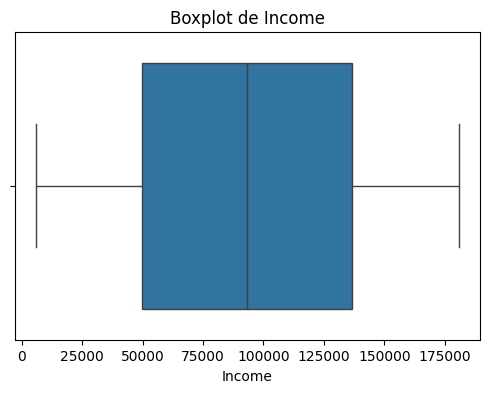

In [13]:
#5. Boxplot de income
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer['Income'])
plt.title('Boxplot de Income')
plt.show()





# 4. Distribución de Kidhome y Teenhome: hogares sin hijos, con hijos.
1. Importo Numpy
2. Conviero las columnas en nº enteros, errores en NaN.
3. Distribución y nulos
4. Total de hijos. Creo variable deribada.


In [14]:
# 2. Convierto en nº enteros, errores.

for c in ['Kidhome','Teenhome']:
    df_customer[c] = pd.to_numeric(df_customer[c], errors='coerce').astype('Int64')


In [15]:
# 3. Distribución básica y nulos

for c in ['Kidhome','Teenhome']:
    print(f"{c}  - nulos:", df_customer[c].isna().sum())
    print(df_customer[c].value_counts(dropna=False).sort_index(), "\n")

Kidhome  - nulos: 0
Kidhome
0    14270
1    14425
2    14475
Name: count, dtype: Int64 

Teenhome  - nulos: 0
Teenhome
0    14402
1    14425
2    14343
Name: count, dtype: Int64 



In [16]:
# 4. Total de hijos
df_customer['Children_total'] = (df_customer['Kidhome'] . fillna(0) +
                                                    df_customer['Teenhome'] . fillna(0)). astype ('int64')


Confirmo la creación de la columna =total children

In [17]:
df_customer. sample(20)


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,income_outlier_iqr,Children_total
9200,166307,0,1,2012-06-07,26,581e479a-5174-43e6-8a6d-db9d0c6a7ac1,False,1
8955,132256,2,1,2012-05-12,16,d85447e1-2079-4a7d-923b-2e2662449b75,False,3
12080,61700,2,1,2012-02-27,23,d6517d9c-b467-4982-8b87-fb863b98fb6e,False,3
10056,109596,0,0,2012-05-10,9,69392ace-fa19-4d7b-bcc0-8954bffedf24,False,0
4619,82464,2,1,2012-08-17,12,9a7ca8f4-4ecb-4908-8a4c-676f60a70567,False,3
5128,95471,0,0,2012-06-08,17,7aa432b8-bf23-427c-97f6-3c7970218d26,False,0
35623,15760,1,1,2014-11-15,7,51579d05-2ede-41a8-a295-42d138f7de4d,False,2
33286,14196,1,2,2014-02-06,2,5ee62d4f-1e6f-4a1a-ab03-c130ff9cfe3a,False,3
3068,163250,1,2,2012-02-25,21,1a28c3e3-6934-4c49-91e6-721880b3163e,False,3
22046,61025,1,1,2013-08-23,4,59c26a47-77a6-42e0-8ac5-7ed3bacd31c6,False,2


Realizo un boxplot de la variable Children_total como verificación visual de la distribución y confirmación de que no existen outliers.

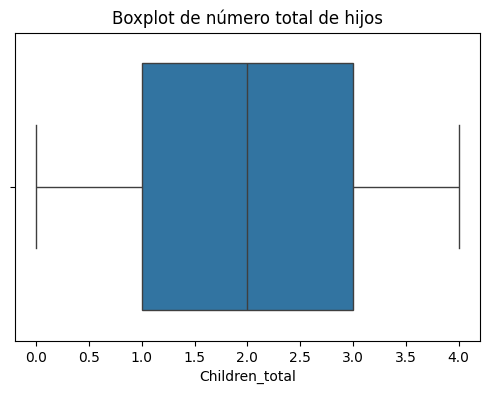

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer['Children_total'])
plt.title("Boxplot de número total de hijos")
plt.show()

# 5. Antiguedad del cliente. Creo columna.
1. Aseguro que la columna es tipo fecha
2. Fecha de referencia hoy
3. Creo columna con años antiguedad
4. Compruebo resultado

In [23]:
df_customer["Dt_Customer"] = pd.to_datetime(df_customer["Dt_Customer"], errors="coerce")   
ref_date = pd.Timestamp.today().normalize()
df_customer["Customer_Tenure_Years"] = ((ref_date - df_customer["Dt_Customer"]).dt.days // 365).astype("Int64")
df_customer[["Dt_Customer", "Customer_Tenure_Years"]].head()



,Dt_Customer,Customer_Tenure_Years
0,2012-04-04,13
1,2012-12-30,12
2,2012-02-02,13
3,2012-12-21,12
4,2012-06-20,13


In [26]:
df_customer. sample(20)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,income_outlier_iqr,Children_total,Customer_Tenure_Years
4874,46960,1,2,2012-06-02,12,f0db76e4-1b5e-49d9-b8e5-f689913eb44b,False,3,13
34251,139354,2,0,2014-05-29,23,f0b0fade-59b4-4652-9df2-816bfcf6d75a,False,2,11
24980,39422,2,0,2013-12-07,14,95dacd0b-1cd9-46b8-81c7-1abd97da9d17,False,2,11
37188,26760,0,1,2014-09-03,13,d8679f28-96a3-4779-911f-78af8d18c87d,False,1,10
16650,175477,1,2,2012-10-19,20,8a8d1055-0119-431d-8dc8-42a4f48932e5,False,3,12
21074,171674,2,1,2013-10-02,23,b89af3d7-4cb8-4e4d-aa50-1368ed98a49b,False,3,11
10105,119148,1,2,2012-10-18,31,026ae79c-a44a-495f-95b4-91ce3956ca12,False,3,12
38493,146804,0,0,2014-11-19,24,a54cc4b5-ba43-4af2-b8cc-e08874884cc4,False,0,10
37864,148097,1,2,2014-04-24,4,5a83c129-2513-48f6-9ca1-662536d88dcf,False,3,11
39512,57079,0,1,2014-11-27,24,40c75dec-ec64-4f02-89c7-035a22f7d98a,False,1,10


# 6. Nº Visitas. Visualizo

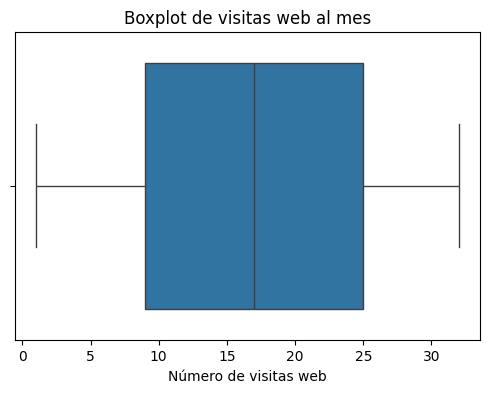

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer["NumWebVisitsMonth"])
plt.title("Boxplot de visitas web al mes")
plt.xlabel("Número de visitas web")
plt.show()

In [19]:
df_bank = pd.read_csv("../Data/Raw/bank-additional.csv")

In [20]:
df_bank. sample(10)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
8400,8497,30.0,services,DIVORCED,basic.9y,0.0,0.0,0.0,telephone,89,...,1.4,"94,465","-41,8","4,864","5228,1",no,23-junio-2017,45.531,-68.051,04b1b366-0826-42b5-bd36-ff948f6fc2ec
15722,15819,36.0,technician,MARRIED,NaN,NaN,1.0,0.0,cellular,81,...,1.4,"93,918","-42,7","4,96","5228,1",no,20-mayo-2017,28.341,-124.202,f3afb4c7-b495-4182-aec9-d041981c9f62
1505,1602,39.0,unemployed,MARRIED,high.school,0.0,1.0,0.0,telephone,380,...,1.1,"93,994","-36,4","4,855",5191,no,10-febrero-2017,43.037,-70.592,eb2fc1cd-3fc7-48a8-b131-0a5c4f2cc35a
781,854,45.0,housemaid,MARRIED,basic.4y,NaN,1.0,0.0,telephone,83,...,1.1,"93,994","-36,4","4,856",5191,no,7-abril-2018,26.113,-99.867,b18aea30-71ee-48b2-ae2c-693389c060f0
28966,29110,37.0,technician,MARRIED,professional.course,0.0,1.0,0.0,cellular,372,...,-1.8,"93,075","-47,1",NaN,"5099,1",no,8-enero-2016,40.597,-104.120,e501a2ea-19ae-4a04-8255-1db93b78fa71
4226,4323,36.0,blue-collar,MARRIED,basic.9y,0.0,0.0,0.0,telephone,148,...,1.1,"93,994","-36,4","4,856",5191,no,10-junio-2018,47.408,-118.513,334df5c2-2467-493d-a34b-765f51f06174
26235,26357,NaN,management,MARRIED,university.degree,0.0,0.0,0.0,cellular,203,...,-0.1,"93,2",-42,"4,076","5195,8",no,11-septiembre-2017,35.686,-84.455,1b4887ec-5801-468b-9add-364f4617f0be
23256,23353,56.0,admin.,MARRIED,university.degree,NaN,1.0,0.0,cellular,66,...,1.4,"93,444","-36,1","4,964","5228,1",no,21-septiembre-2015,47.289,-89.893,7f2fcdc4-416e-4158-9163-db9ce78fa9d4
7158,7255,42.0,blue-collar,MARRIED,basic.4y,0.0,1.0,0.0,telephone,384,...,1.1,"93,994","-36,4","4,86",5191,no,19-julio-2015,40.366,-109.008,018d1ec7-30cc-487a-8c73-4566c290d8c0
11095,11192,45.0,NaN,MARRIED,NaN,0.0,0.0,0.0,telephone,141,...,1.4,"94,465","-41,8",NaN,"5228,1",no,26-noviembre-2015,44.445,-97.995,97415ae6-bfaa-4198-9a17-143aa189d637


In [21]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

# Columnas e información ( Hay datos incompletos)

0. Unnamed:  se puede eliminar

1. age (float64): edad de la persona.

2. job (object): profesión.

3. marital (object): estado civil.

4. education (object): educación.

5. default (float64): si el cliente tiene crédito con impago (posibles nulos).

6. housing (float64): si tiene préstamo hipotecario (posibles nulos).

7. loan (float64): si tiene préstamo personal (posibles nulos).

8. contact (object): tipo de contacto.

9. duration (int64): duración de la llamada/contacto en segundos.

10. campaign (int64):  número de veces que se ha contactado al cliente.

11. pdays (int64): días desde el último contacto (999 significa que nunca se contactó).

12. previous (int64): número de contactos anteriores.

13. poutcome (object): resultado de campaña de marketing anterior.

14. emp.var.rate (float64): indicador económico (tasa de variación del empleo).

15. cons.price.idx (object): indice de precios del consumidor.

16. cons.conf.idx (object): indice de confianza del consumidor.

17. euribor3m (object): tasa de interés euríbor a 3 meses.

18. nr.employed (object): número de empleados (indicador económico).

19. month (object): mes del último contacto de la campaña.

20. day_of_week (object): día de la semana del último contacto.

21. longitude (float64): localización geográfica.

22. id (object): identificador único del cliente.

23. y (object): variable objetivo (si el cliente contrató o no el producto/servicio).


# * Pasos limpieza y transformación



Eliminar Unnamed: 0.

Revisar valores faltantes (default, housing, loan, marital, job).

Analizar la variable objetivo y (cuántos clientes aceptaron vs rechazaron)

Distribución de edad: ver segmentos más contactados.

Cruzar duración de llamadas (duration) con éxito (y).

Revisar variables económicas (euribor3m, emp.var.rate): ómo influyen en la respuesta.

Outliers en duración de llamadas y pdays.




